# Diabetes Prediction & EDA

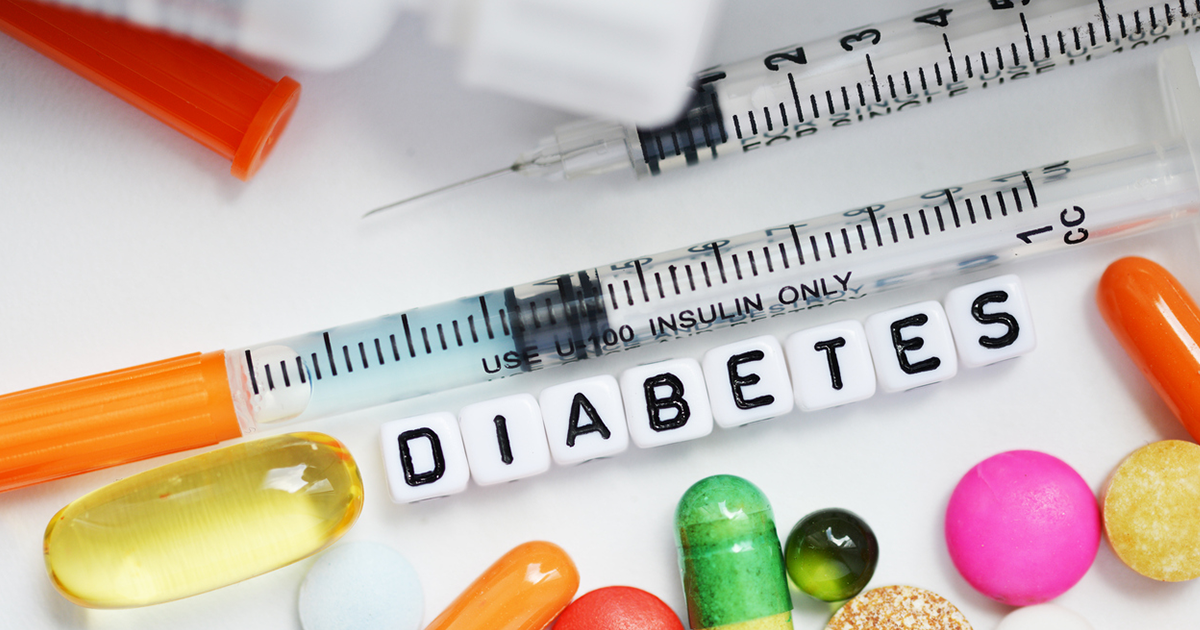

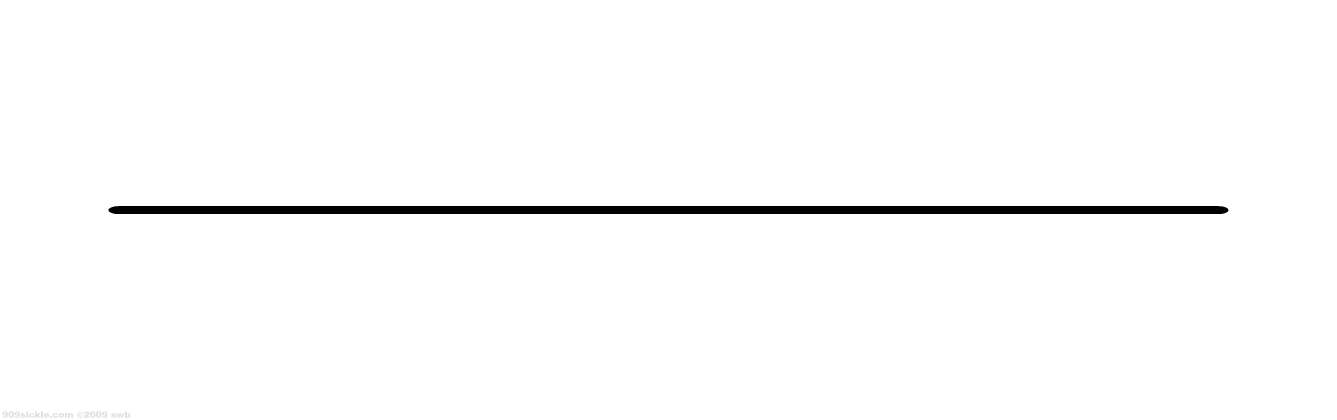

# *Introduction*


### Diabetes mellitus (DM), commonly known as just diabetes, is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time. Symptoms often include frequent urination, increased thirst and increased appetite. If left untreated, diabetes can cause many health complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, damage to the nerves, damage to the eyes and cognitive impairment.

## Types of Diabetes

There are three main types of diabetes: type 1, type 2, and gestational diabetes (diabetes while pregnant).

### Type 1 Diabetes

Type 1 diabetes is thought to be caused by an autoimmune reaction (the body attacks itself by mistake) that stops your body from making insulin. Approximately 5-10% of the people who have diabetes have type 1. Symptoms of type 1 diabetes often develop quickly. It’s usually diagnosed in children, teens, and young adults. If you have type 1 diabetes, you’ll need to take insulin every day to survive. Currently, no one knows how to prevent type 1 diabetes.

### Type 2 Diabetes

With type 2 diabetes, your body doesn’t use insulin well and can’t keep blood sugar at normal levels. About 90-95% of people with diabetes have type 2. It develops over many years and is usually diagnosed in adults (but more and more in children, teens, and young adults). You may not notice any symptoms, so it’s important to get your blood sugar tested if you’re at risk. Type 2 diabetes can be prevented or delayed with healthy lifestyle changes, such as losing weight, eating healthy food, and being active.

### Gestational Diabetes

Gestational diabetes develops in pregnant women who have never had diabetes. If you have gestational diabetes, your baby could be at higher risk for health problems. Gestational diabetes usually goes away after your baby is born but increases your risk for type 2 diabetes later in life. Your baby is more likely to have obesity as a child or teen, and more likely to develop type 2 diabetes later in life too.

***

# *About The Dataset*

   ### Pima Indians Diabetes Database



 This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# CONTENT

The population for this study was the Pima Indian population near Phoenix, Arizona. The population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes.

### *Dataset : (https://www.kaggle.com/uciml/pima-indians-diabetes-database)*

Given this medical data,we should make better predictions so as to make peoples/doctors lives easier.
We can learn from the data found on UCI Machine Learning Repository which contains data on female patients at least 21 years old of Pima Indian heritage

### *We have 768 instances and the following 8 attributes:*

Number of times pregnant (preg)
Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)

Diastolic blood pressure in mm Hg (pres)

Triceps skin fold thickness in mm (skin)

2-Hour serum insulin in mu U/ml (insu)

Body mass index measured as weight in kg/(height in m)^2 (mass)

Diabetes pedigree function (pedi)

Age in years (age)

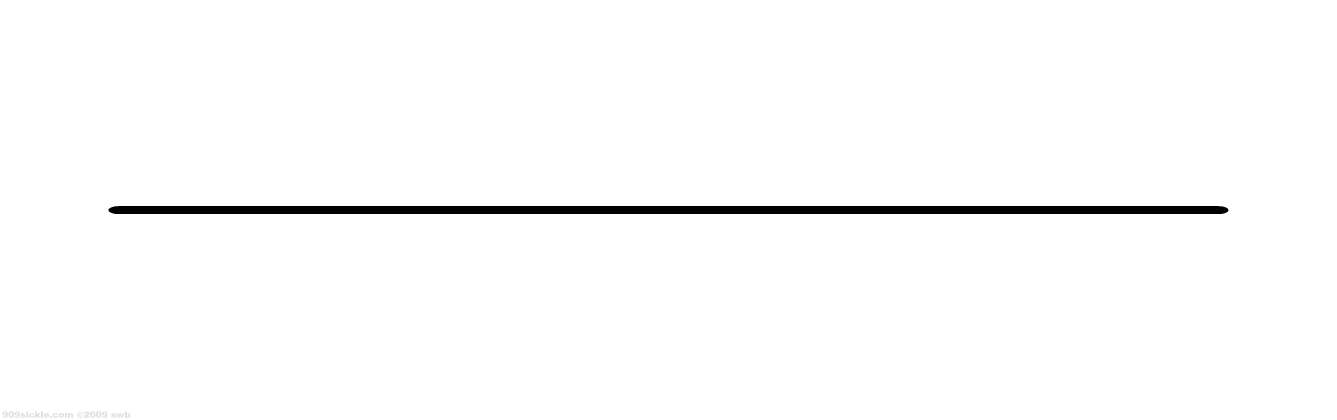

# Improting the Libraries

In [16]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import time

#visulaization modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#Data Preprocessing Tools
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder,
                                   MinMaxScaler)
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score




## Loading the dataset


In [17]:
diabetes_data = pd.read_csv(r"C:\Users\raksh\Desktop\DiabetesPrediction-main\DiabetesPrediction-main\diabetes.csv")

#Print the first 5 rows of the dataframe.
diabetes_data.head()

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0     6.000000    148.0           72.0           35.0    125.0   
1           1     1.000000     85.0           66.0           29.0    125.0   
2           2     8.000000    183.0           64.0           29.0    125.0   
3           3     1.000000     89.0           66.0           23.0     94.0   
4           4     4.494673    137.0           40.0           35.0    168.0   

    BMI  DiabetesPedigreeFunction  Age  Outcome  
0  33.6                     0.627   50        1  
1  26.6                     0.351   31        0  
2  23.3                     0.672   32        1  
3  28.1                     0.167   21        0  
4  43.1                     2.288   33        1

# EDA and statistical analysis


In [18]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 60.1 KB


In [19]:
diabetes_data.describe()


Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     4.494673  121.686763      72.405184      29.108073   
std    221.846794     2.975395   30.435949      12.096346       8.791221   
min      0.000000     1.000000   44.000000      24.000000       7.000000   
25%    191.750000     2.000000   99.750000      64.000000      25.000000   
50%    383.500000     4.494673  117.000000      72.202592      29.000000   
75%    575.250000     6.000000  140.250000      80.000000      32.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  \
count  768.000000  768.000000                768.000000  768.000000   
mean   140.671875   32.455208                  0.471876   33.240885   
std     86.383060    6.875177                  0.331329   11.760232   
min     14.000000   18.200000                  0.078000   21.000000   
25%    121.500000   27.500000                  0.243750   24.000000   
50%    125.000000   32.300000                  0.372500   29.000000   
75%    127.250000   36.600000                  0.626250   41.000000   
max    846.000000   67.100000                  2.420000   81.000000   

          Outcome  
count  768.000000  
mean     0.348958  
std      0.476951  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [20]:
diabetes_data.shape

(768, 10)

In [21]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 60.1 KB


In [22]:
diabetes_data.describe().T

count        mean         std     min        25%  \
Unnamed: 0                768.0  383.500000  221.846794   0.000  191.75000   
Pregnancies               768.0    4.494673    2.975395   1.000    2.00000   
Glucose                   768.0  121.686763   30.435949  44.000   99.75000   
BloodPressure             768.0   72.405184   12.096346  24.000   64.00000   
SkinThickness             768.0   29.108073    8.791221   7.000   25.00000   
Insulin                   768.0  140.671875   86.383060  14.000  121.50000   
BMI                       768.0   32.455208    6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078    0.24375   
Age                       768.0   33.240885   11.760232  21.000   24.00000   
Outcome                   768.0    0.348958    0.476951   0.000    0.00000   

                                 50%        75%     max  
Unnamed: 0                383.500000  575.25000  767.00  
Pregnancies                 4.494673    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.202592   80.00000  122.00  
SkinThickness              29.000000   32.00000   99.00  
Insulin                   125.000000  127.25000  846.00  
BMI                        32.300000   36.60000   67.10  
DiabetesPedigreeFunction    0.372500    0.62625    2.42  
Age                        29.000000   41.00000   81.00  
Outcome                     0.000000    1.00000    1.00

# What do we find out with this summary ?
***
-  ### *On these columns, a value of zero does not make sense and thus indicates missing value.*
-  ###     *It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values*
***


 Following columns or variables have an invalid zero value:

1 Glucose

2 BloodPressure

3 SkinThickness

4 Insulin

5 BMI
***

In [23]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pregnancies']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pregnancies']].replace(0,np.NaN)
diabetes_data.head()

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0     6.000000    148.0           72.0           35.0    125.0   
1           1     1.000000     85.0           66.0           29.0    125.0   
2           2     8.000000    183.0           64.0           29.0    125.0   
3           3     1.000000     89.0           66.0           23.0     94.0   
4           4     4.494673    137.0           40.0           35.0    168.0   

    BMI  DiabetesPedigreeFunction  Age  Outcome  
0  33.6                     0.627   50        1  
1  26.6                     0.351   31        0  
2  23.3                     0.672   32        1  
3  28.1                     0.167   21        0  
4  43.1                     2.288   33        1

In [24]:
diabetes_data.describe().T

count        mean         std     min        25%  \
Unnamed: 0                768.0  383.500000  221.846794   0.000  191.75000   
Pregnancies               768.0    4.494673    2.975395   1.000    2.00000   
Glucose                   768.0  121.686763   30.435949  44.000   99.75000   
BloodPressure             768.0   72.405184   12.096346  24.000   64.00000   
SkinThickness             768.0   29.108073    8.791221   7.000   25.00000   
Insulin                   768.0  140.671875   86.383060  14.000  121.50000   
BMI                       768.0   32.455208    6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078    0.24375   
Age                       768.0   33.240885   11.760232  21.000   24.00000   
Outcome                   768.0    0.348958    0.476951   0.000    0.00000   

                                 50%        75%     max  
Unnamed: 0                383.500000  575.25000  767.00  
Pregnancies                 4.494673    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.202592   80.00000  122.00  
SkinThickness              29.000000   32.00000   99.00  
Insulin                   125.000000  127.25000  846.00  
BMI                        32.300000   36.60000   67.10  
DiabetesPedigreeFunction    0.372500    0.62625    2.42  
Age                        29.000000   41.00000   81.00  
Outcome                     0.000000    1.00000    1.00

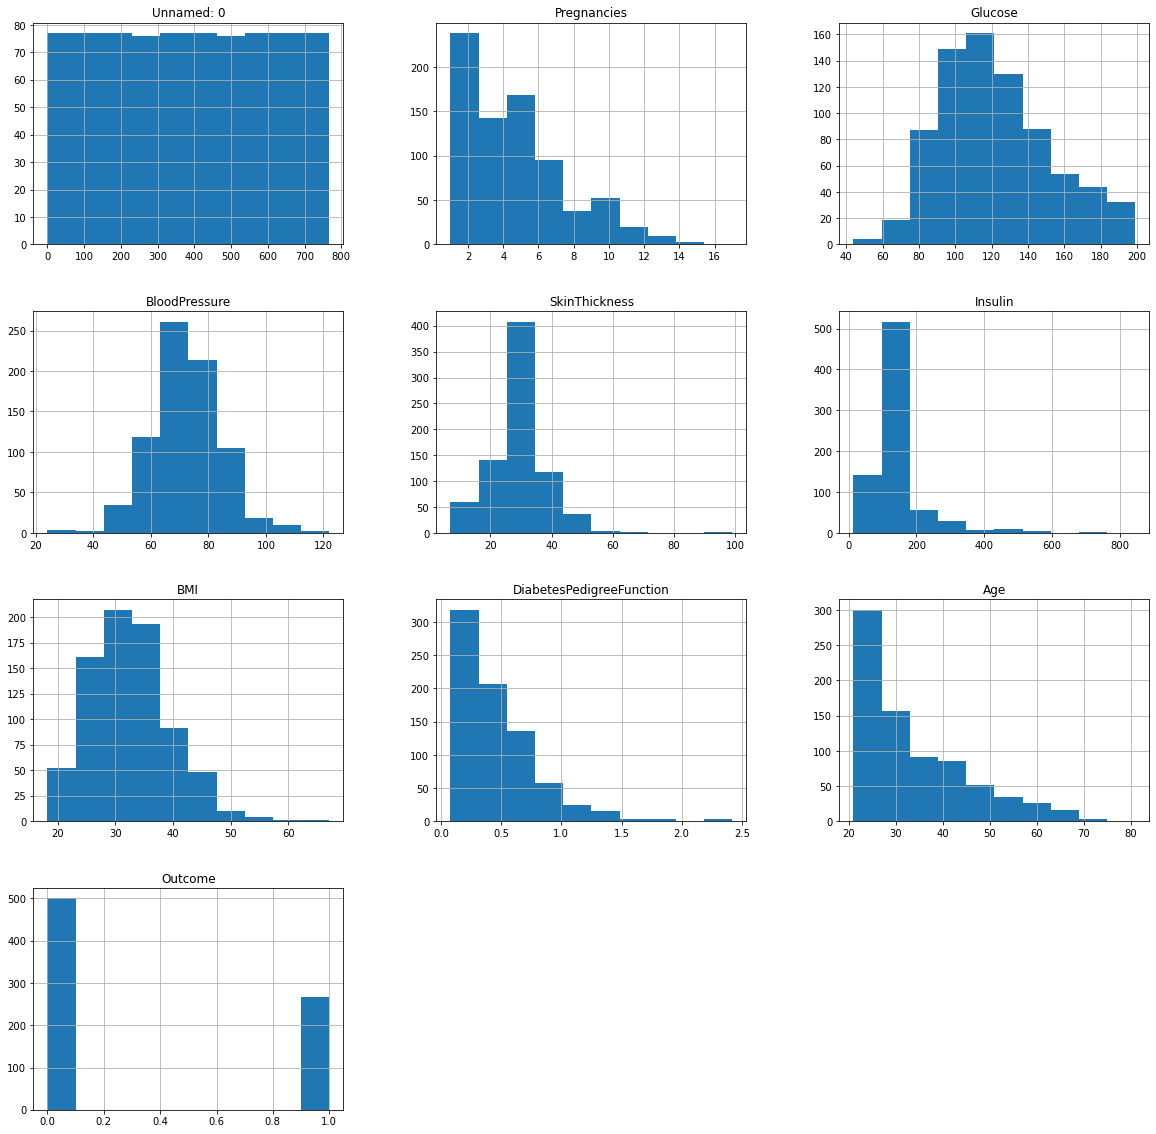

In [25]:
p = diabetes_data.hist(figsize = (20,20))

In [26]:
import missingno as msno
fig, ax = plt.subplots(figsize = (0,0.1), dpi = 70)
msno.bar(diabetes_data, sort = 'descending', 
         color = color, 
          fontsize =30,
         labels = 'off',filter = 'top')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Serif', 'Size': 100,'weight':'normal',}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

ModuleNotFoundError: No module named 'missingno'

*Aiming to impute nan values for the columns in accordance with their distribution*

In [ ]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)
diabetes_data['Pregnancies'].fillna(diabetes_data['Pregnancies'].mean(), inplace = True)


In [ ]:
diabetes_data.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    4.494673   2.975395   1.000    2.00000   
Glucose                   768.0  121.686763  30.435949  44.000   99.75000   
BloodPressure             768.0   72.405184  12.096346  24.000   64.00000   
SkinThickness             768.0   29.108073   8.791221   7.000   25.00000   
Insulin                   768.0  140.671875  86.383060  14.000  121.50000   
BMI                       768.0   32.455208   6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                                 50%        75%     max  
Pregnancies                 4.494673    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.202592   80.00000  122.00  
SkinThickness              29.000000   32.00000   99.00  
Insulin                   125.000000  127.25000  846.00  
BMI                        32.300000   36.60000   67.10  
DiabetesPedigreeFunction    0.372500    0.62625    2.42  
Age                        29.000000   41.00000   81.00  
Outcome                     0.000000    1.00000    1.00

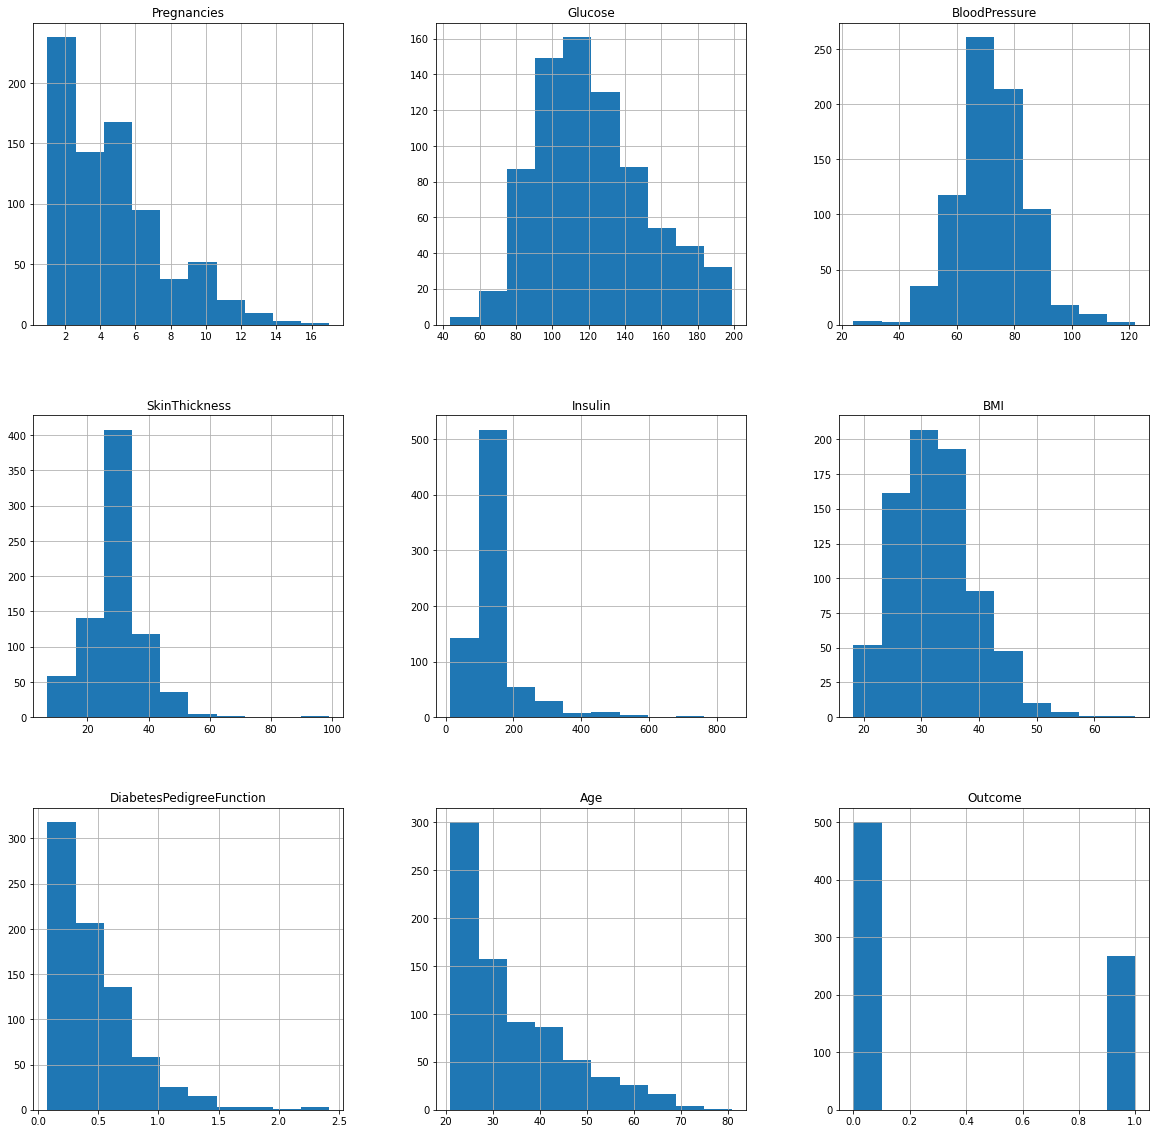

In [ ]:
p = diabetes_data.hist(figsize = (20,20))

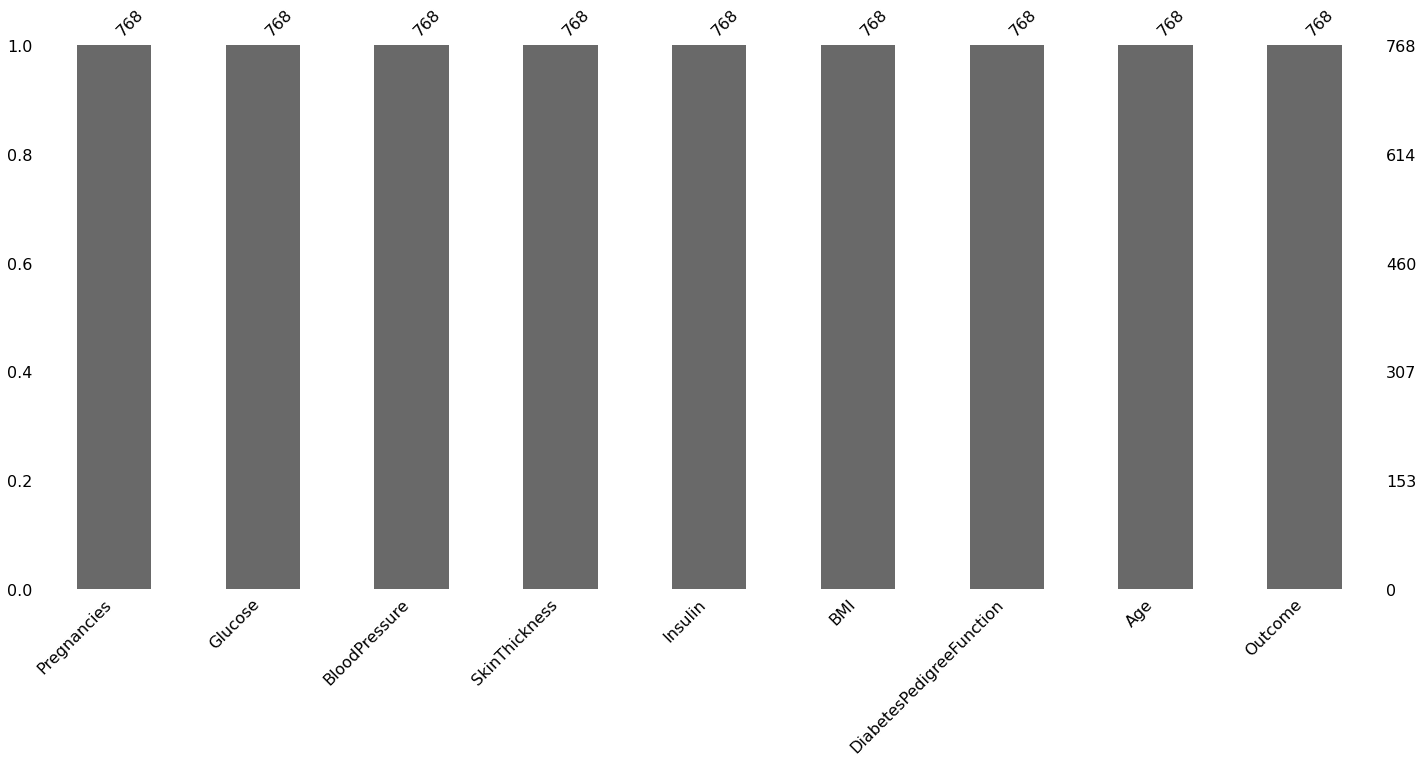

In [ ]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)
#no null values

#### The below graph shows that the data is biased towards datapointshaving outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients


0    500
1    268
Name: Outcome, dtype: int64


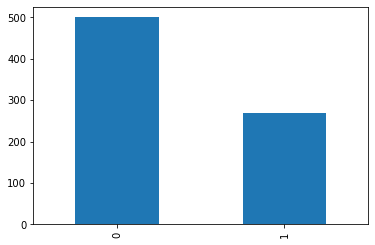

In [ ]:
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

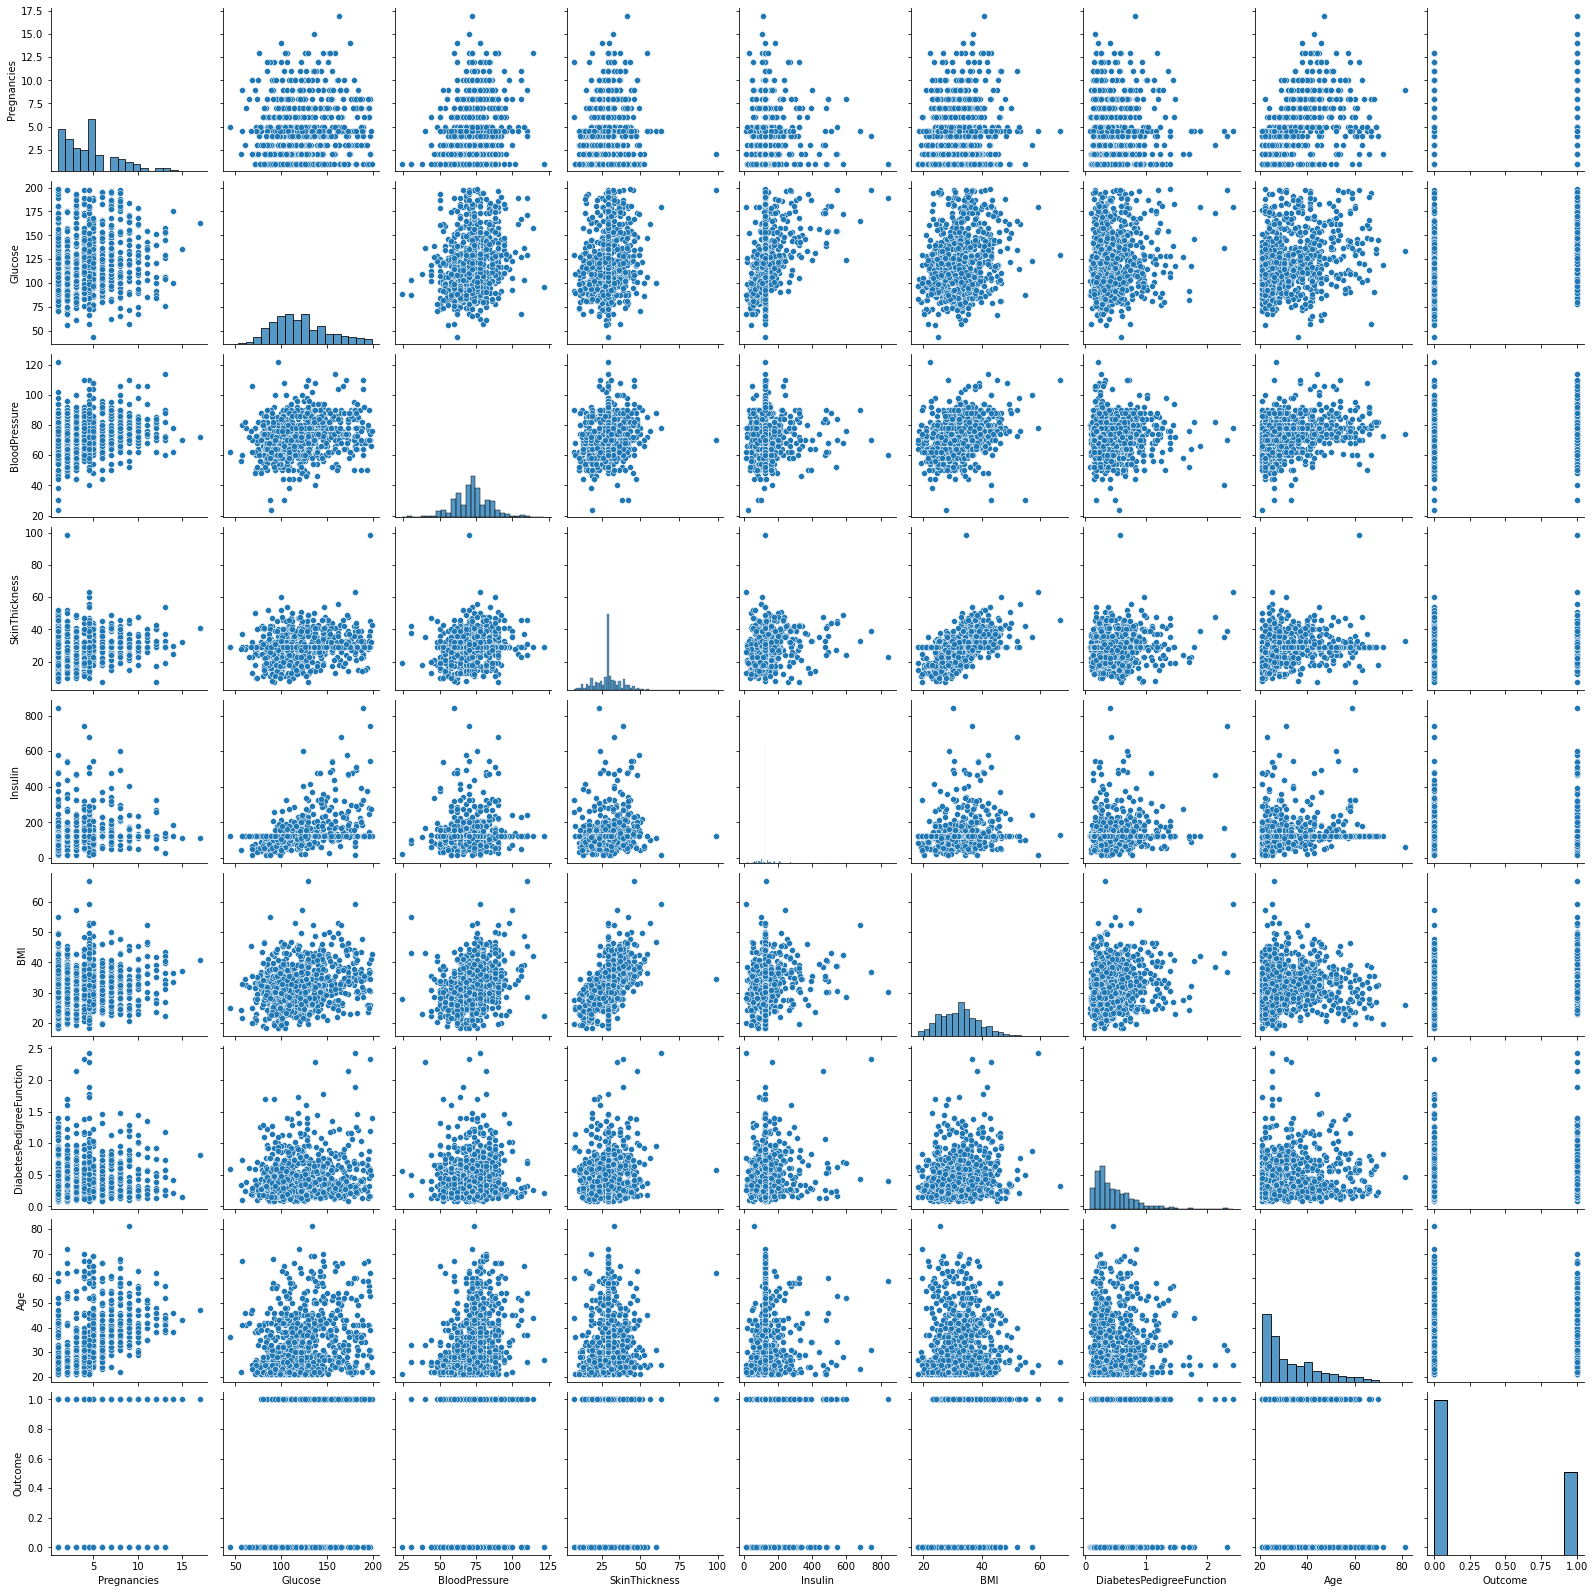

In [ ]:
#The scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables
sns.pairplot(diabetes_data)

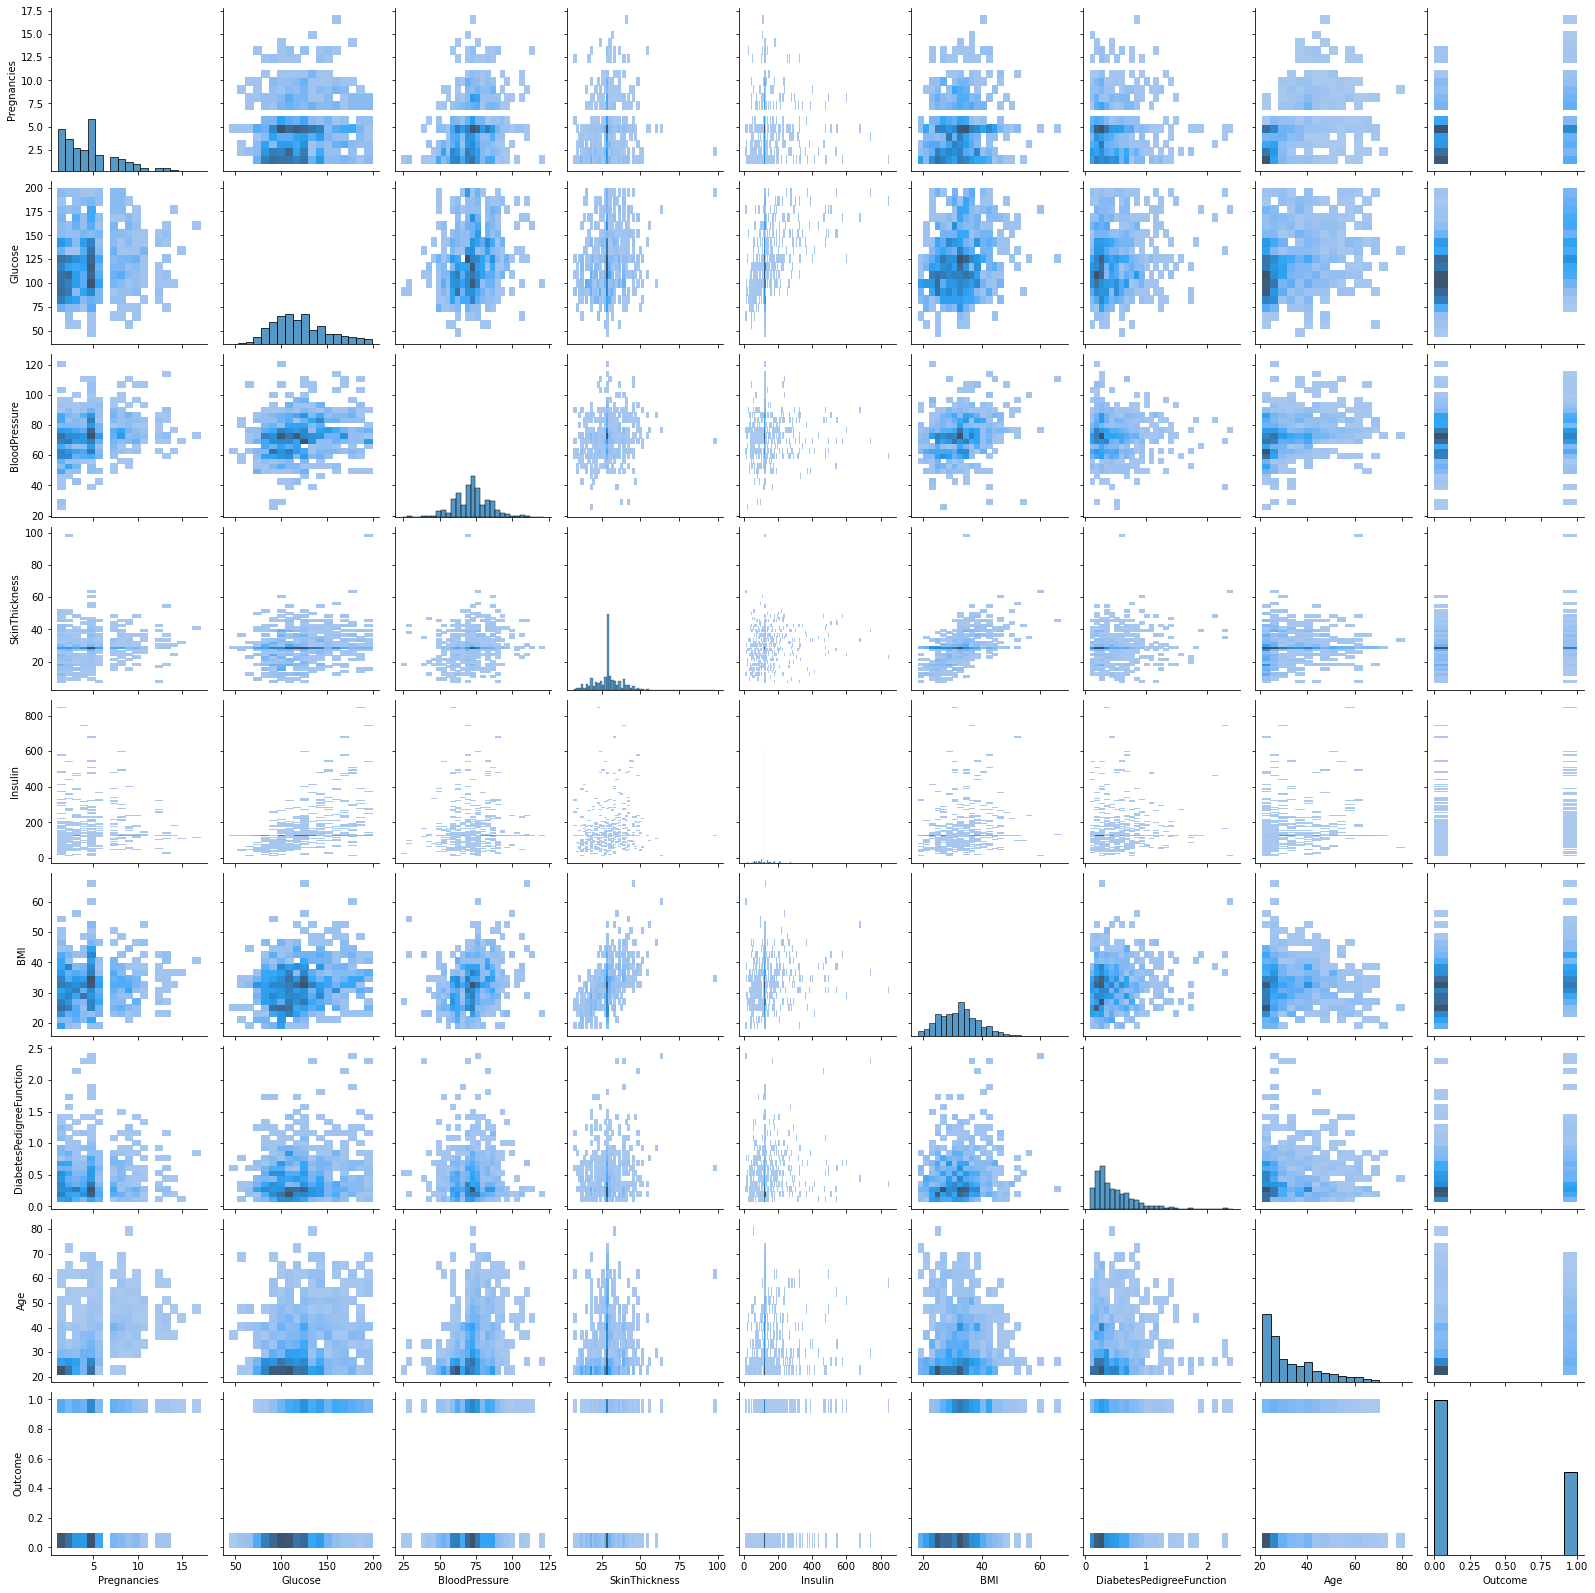

In [ ]:
#The histogram on the diagonal allows us to see the distribution of a single variable
sns.pairplot(diabetes_data, kind='hist')

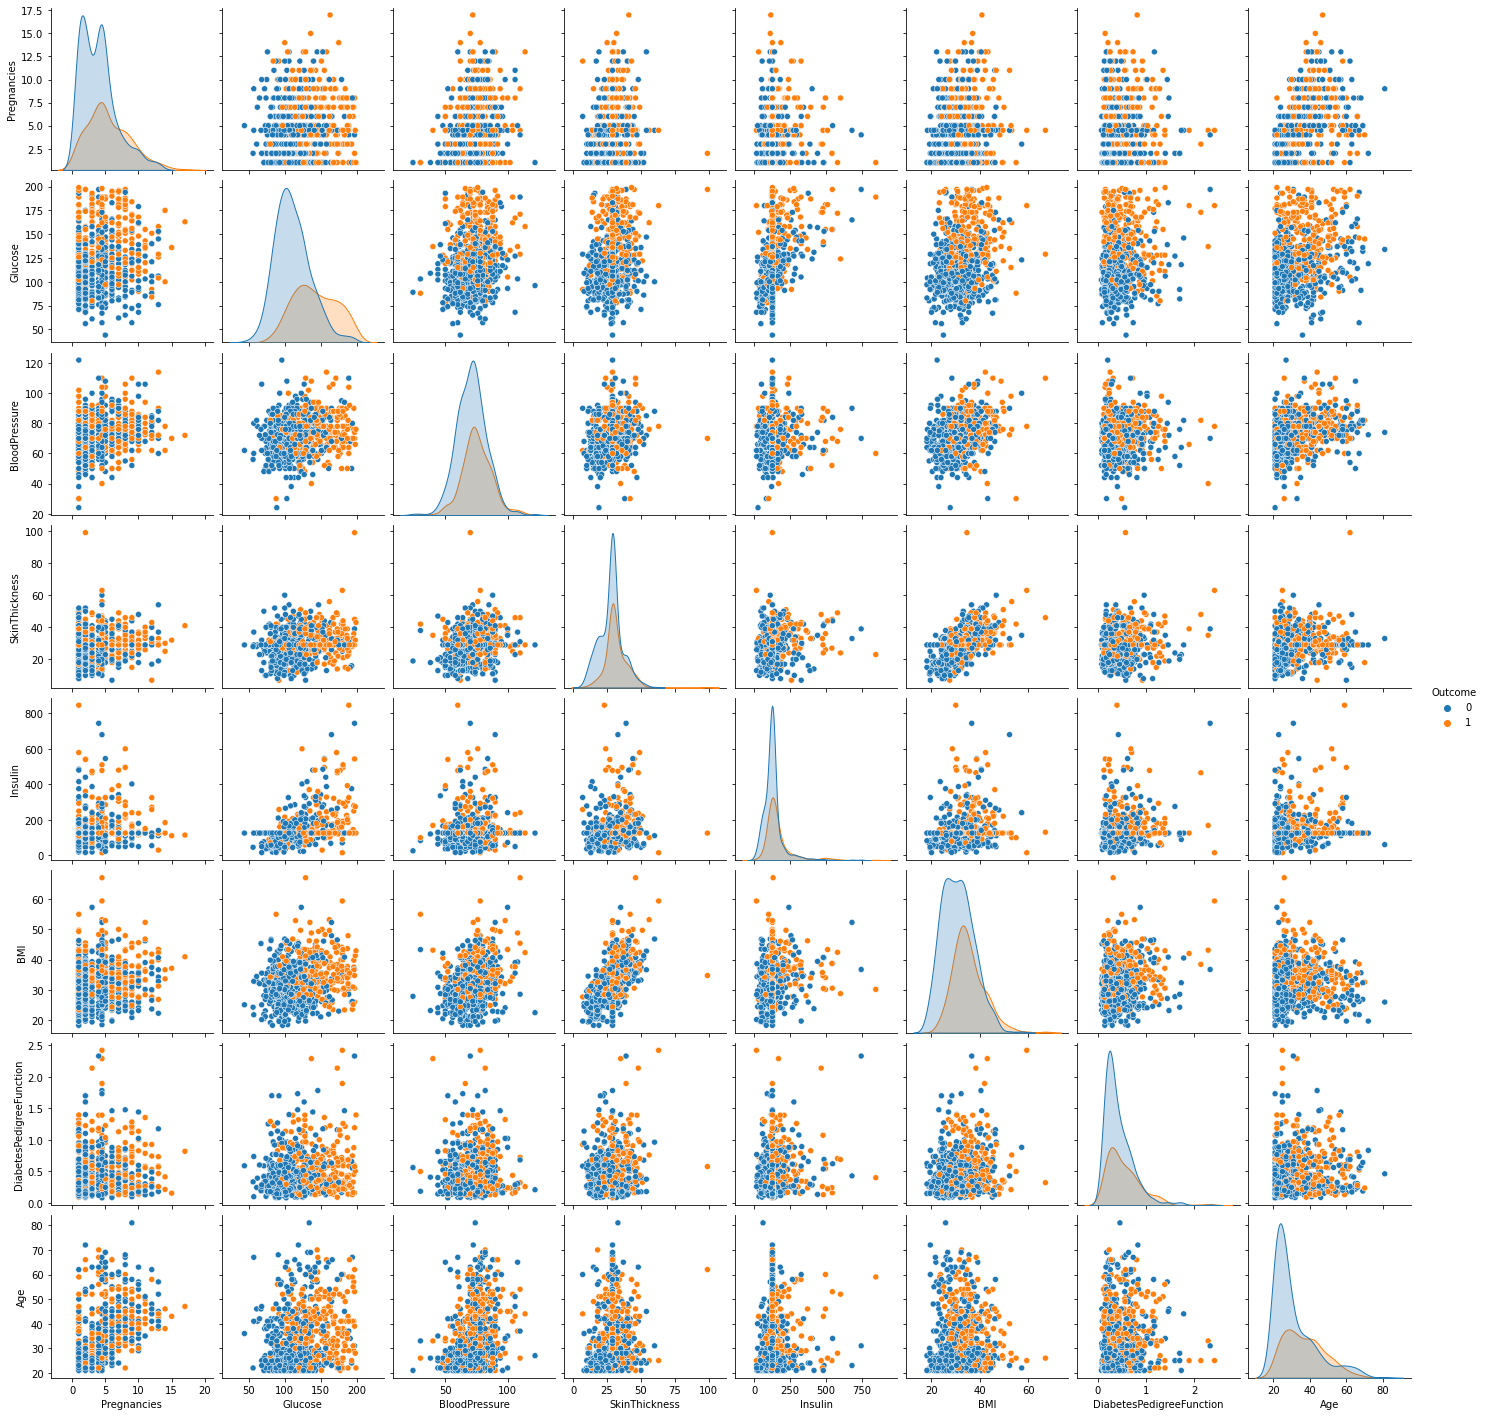

In [ ]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

## Correlation 

**Pearson's correlation coefficient** is the covariance of the two variables divided by the product of their standard deviations. The form of the definition involves a "product moment", that is, the mean (the first moment about the origin) of the product of the mean-adjusted random variables; hence the modifier product-moment in the name. ***It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.***


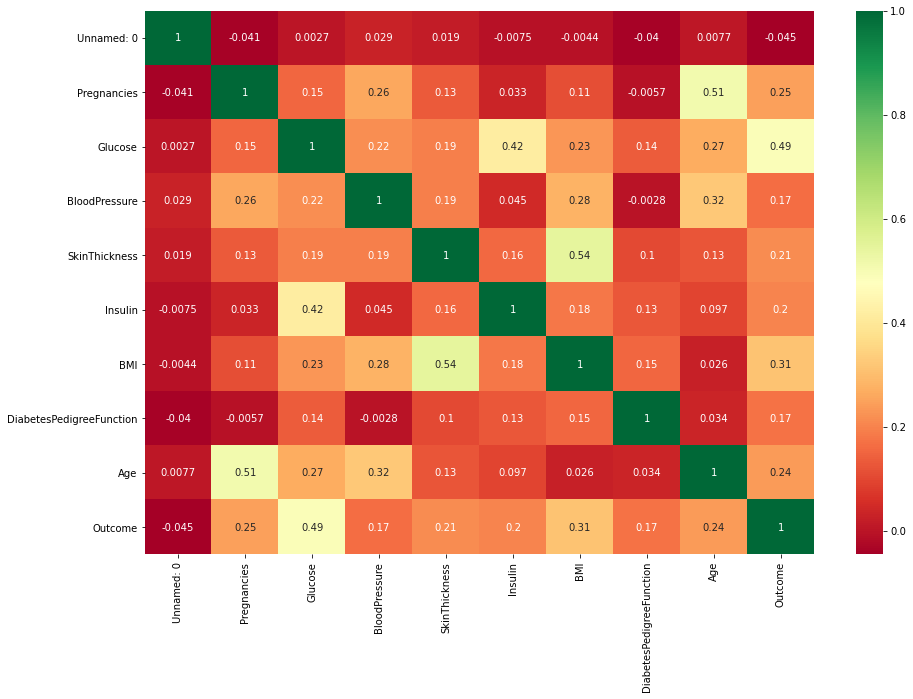

In [27]:
plt.figure(figsize=(15,10)) 
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn') 

# Scalling the data 
### Why Scaling
- Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.
If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.


- It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.
   
   

**Standardisation**:
Standardisation replaces the values by their Z scores.
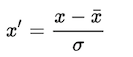
This redistributes the features with their mean μ = 0 and standard deviation σ =1 . sklearn.preprocessing.scale helps us implementing standardisation in python.

In [34]:
X =  pd.DataFrame(diabetes_data.drop(["Outcome"],axis = 1))

In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X.head()

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0     6.000000    148.0           72.0           35.0    125.0   
1           1     1.000000     85.0           66.0           29.0    125.0   
2           2     8.000000    183.0           64.0           29.0    125.0   
3           3     1.000000     89.0           66.0           23.0     94.0   
4           4     4.494673    137.0           40.0           35.0    168.0   

    BMI  DiabetesPedigreeFunction  Age  
0  33.6                     0.627   50  
1  26.6                     0.351   31  
2  23.3                     0.672   32  
3  28.1                     0.167   21  
4  43.1                     2.288   33

# Train Test Split 


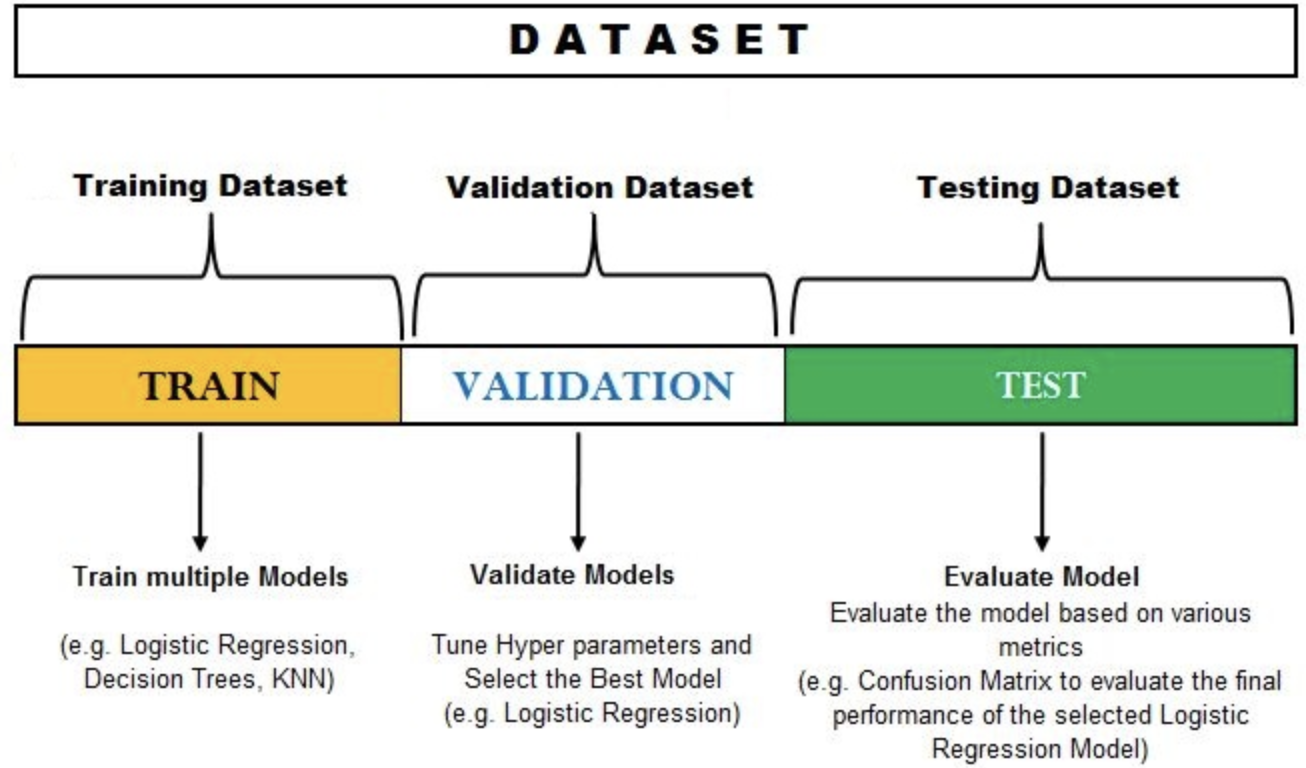

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Train Dataset: Used to fit the machine learning model.
Test Dataset: Used to evaluate the fit machine learning model.

Common split percentages include:

- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

## Cross Validation

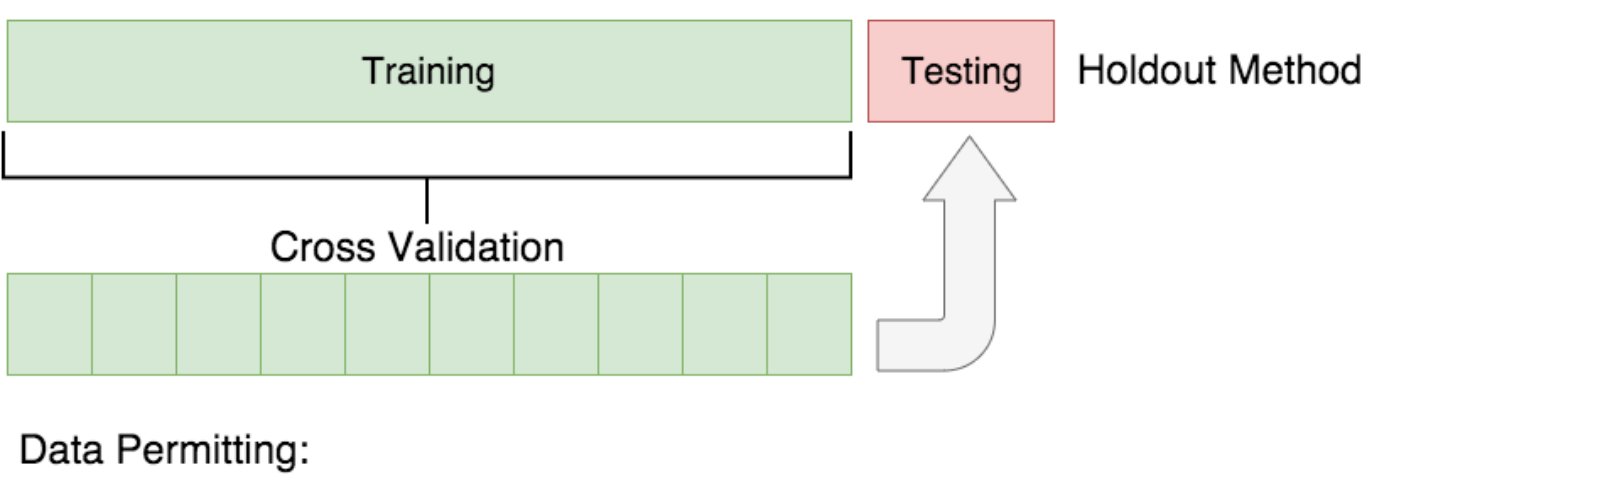

When we have to tune hyperparameters of a model, to know whether the value of hyperparameter that we chose is optimal or not, we have to run the model on test set. But if we use the test set more than once, then the information from test dataset leaks to the model. This leads to over-fitting or byhearting the value of dependent variable. To avoid that, we use cross-validation.

We use one more test set, that is called validation set to tune the hyperparameters.  Following picture depicts the 3-fold CV. K-fold CV corresponds to subdividing the dataset into k folds such that each fold gets the chance to be in both training set and validation set.

***CV-accuracy is computed by averaging accuracy levels in these three folds.***

By default, the cross val score function uses StratifiedKFold for classification and KFold for other tasks.
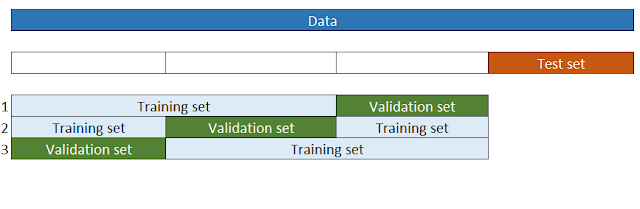

**StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.**

In [37]:
X = diabetes_data.drop(columns = ['Outcome'])
y = diabetes_data.Outcome

In [38]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 9)
(256, 9)
(512,)
(256,)


# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,20):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

NameError: name 'y_pred' is not defined

## Choosing the k-value

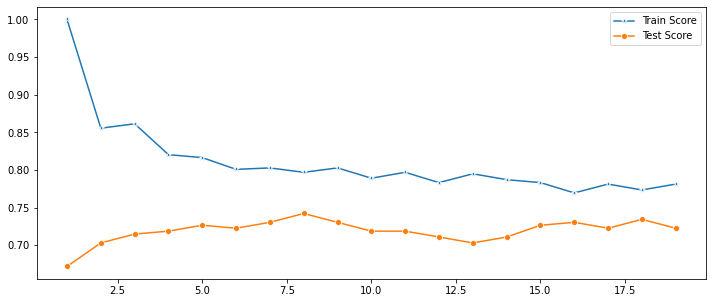

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')


In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.21875 % and k = [8]


In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(8)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7421875

# Confusion Matrix

When we get the data, after data cleaning, pre-processing, and wrangling, the first step we do is to feed it to an outstanding model and of course, get output in probabilities. But hold on! How in the hell can we measure the effectiveness of our model. Better the effectiveness, better the performance, and that is exactly what we want. And it is where the Confusion matrix comes into the limelight. Confusion Matrix is a performance measurement for machine learning classification.

**What is Confusion Matrix and why you need it?**

Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

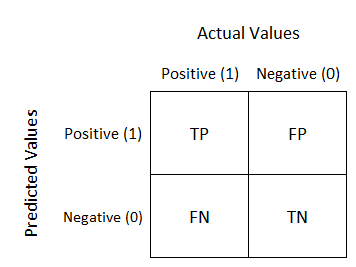

It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.

****

## In the famous cancer example:

**Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.**

**Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.**

**Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.**

**Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”**

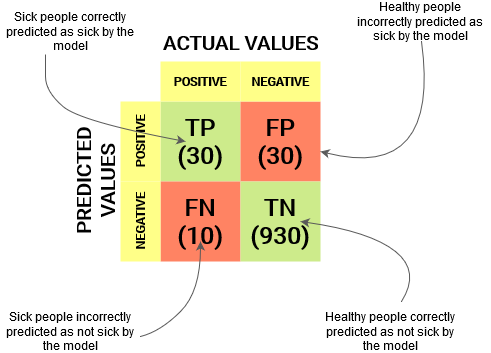

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          142  25  167
1           41  48   89
All        183  73  256

Text(0.5, 69.0, 'Predicted label')

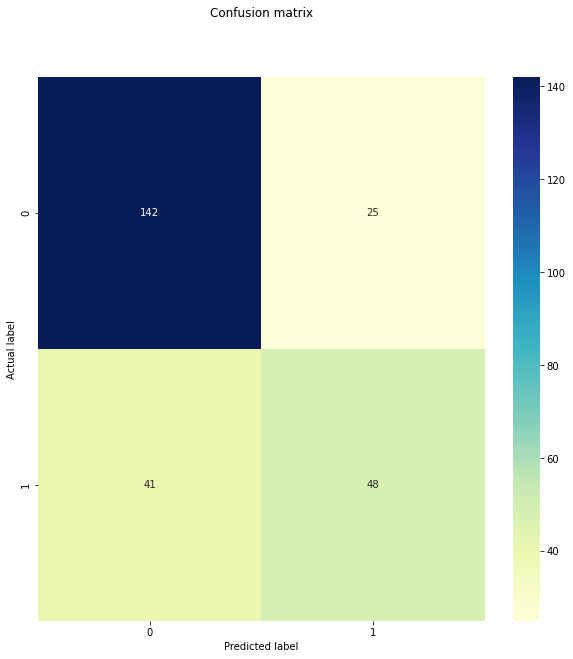

In [ ]:
#visualizing

plt.figure(figsize=(10, 10))
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Classification Report 

**Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

**Accuracy** = TP+TN/TP+FP+FN+TN

**Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

**Precision** = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

**F1 Score** = 2*(Recall * Precision) / (Recall + Precision)

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       167
           1       0.66      0.54      0.59        89

    accuracy                           0.74       256
   macro avg       0.72      0.69      0.70       256
weighted avg       0.73      0.74      0.74       256



**ROC - AUC**

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

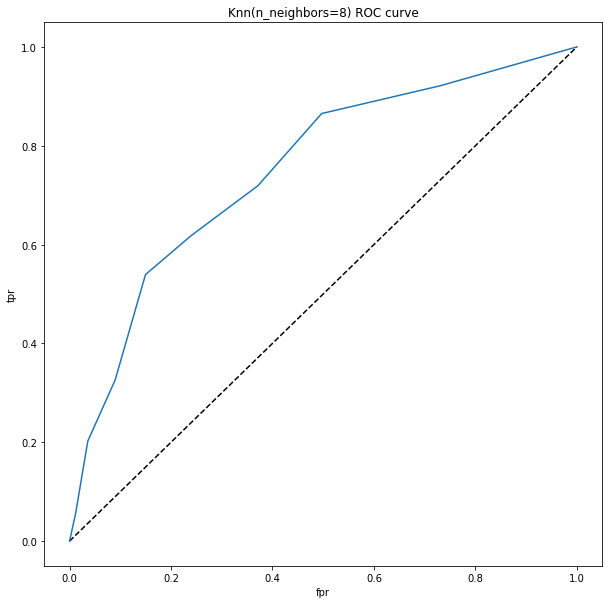

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#visualization
plt.figure(figsize=(10, 10))

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7506896319720111

In [ ]:
knn.predict(X_test)[:10]

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X_train,y_train)
logistic_regression


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
logistic_regression.intercept_


array([-5.20236159])

In [ ]:
logistic_regression.coef_


array([[ 1.80047144e-01,  2.85774737e-02, -2.60089170e-02,
        -1.75103879e-02,  9.08168570e-04,  7.20729218e-02,
         2.95531037e-01, -2.38471655e-04]])

**Stats Model**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
lr_statsmodel = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.570254
         Iterations 6


In [ ]:
lr_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  512
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:                  0.1189
Time:                        19:10:30   Log-Likelihood:                -291.97
converged:                       True   LL-Null:                       -331.37
Covariance Type:            nonrobust   LLR p-value:                 2.422e-14
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.2021      0.041      4.889      0.000       0.121       0.283
Glucose                      0.0210      0.004      5.312      0.000       0.013       0.029
BloodPressure               -0.0563      0.008     -6.630      0.000      -0.073      -0.040
SkinThickness               -0.0259      0.015     -1.730      0.084      -0.055       0.003
Insulin                      0.0015      0.002      1.005      0.315      -0.001       0.004
BMI                          0.0273      0.018      1.543      0.123      -0.007       0.062
DiabetesPedigreeFunction     0.1060      0.305      0.347      0.728      -0.493       0.705
Age                         -0.0114      0.011     -1.048      0.295      -0.033       0.010
============================================================================================
"""

In [ ]:
#prediction 
y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[143,  24],
       [ 43,  46]], dtype=int64)

In [ ]:
print("Our Accuracy is: ", (96+34)/(96+12+26+34))

Our Accuracy is:  0.7738095238095238


In [ ]:
accuracy_score(y_test,y_pred)


0.73828125

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.77      0.86      0.81       167
           1       0.66      0.52      0.58        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.69       256
weighted avg       0.73      0.74      0.73       256



### Tuning the model with cross validation 

In [ ]:
accuracies= cross_val_score(estimator=logistic_regression,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 77.33 %
Standart Deviation of Accuracies: 4.33 %


In [ ]:
logistic_regression.predict(X_test)[:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [ ]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X,y)


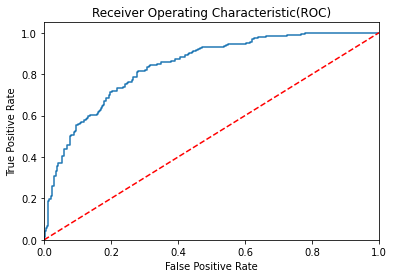

In [ ]:
logistic_regression_roc = roc_auc_score(y,logistic_regression.predict(X))

fp,tp,trshld = roc_curve(y,logistic_regression.predict_proba(X)[:,1])
plt.figure()
plt.plot(fp,tp,label="Area Under Curve(AUC)" %logistic_regression_roc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6865706788669851

In [ ]:
from sklearn.svm import SVC,LinearSVC
support_vector_classifier = SVC(kernel="linear").fit(X_train,y_train)
support_vector_classifier


SVC(kernel='linear')

In [ ]:
support_vector_classifier


SVC(kernel='linear')

In [ ]:
y_pred = support_vector_classifier.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[141,  26],
       [ 43,  46]], dtype=int64)

In [ ]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))


Our Accuracy is:  0.73046875


In [ ]:
accuracy_score(y_test,y_pred)

0.73046875

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       167
           1       0.64      0.52      0.57        89

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256



### Model Tuning & Validation

In [ ]:
accuracies= cross_val_score(estimator=support_vector_classifier,
                            X=X_train,y=y_train,
                            cv=50)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 78.69 %
Standart Deviation of Accuracies: 11.79 %


In [ ]:
support_vector_classifier.predict(X_test)[:10]


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

### RANDOM FOREST

In [45]:
import numpy as np
import pandas as pd
import pickle
# Loading the dataset
df = pd.read_csv(r'C:\Users\raksh\Desktop\DiabetesPrediction-main\DiabetesPrediction-main\diabetes.csv')

# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

# Model Building
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)



RandomForestClassifier(n_estimators=20)

In [49]:
classifier.score(X_test, y_test)


0.7727272727272727